c:\Users\TIAGOFOA\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


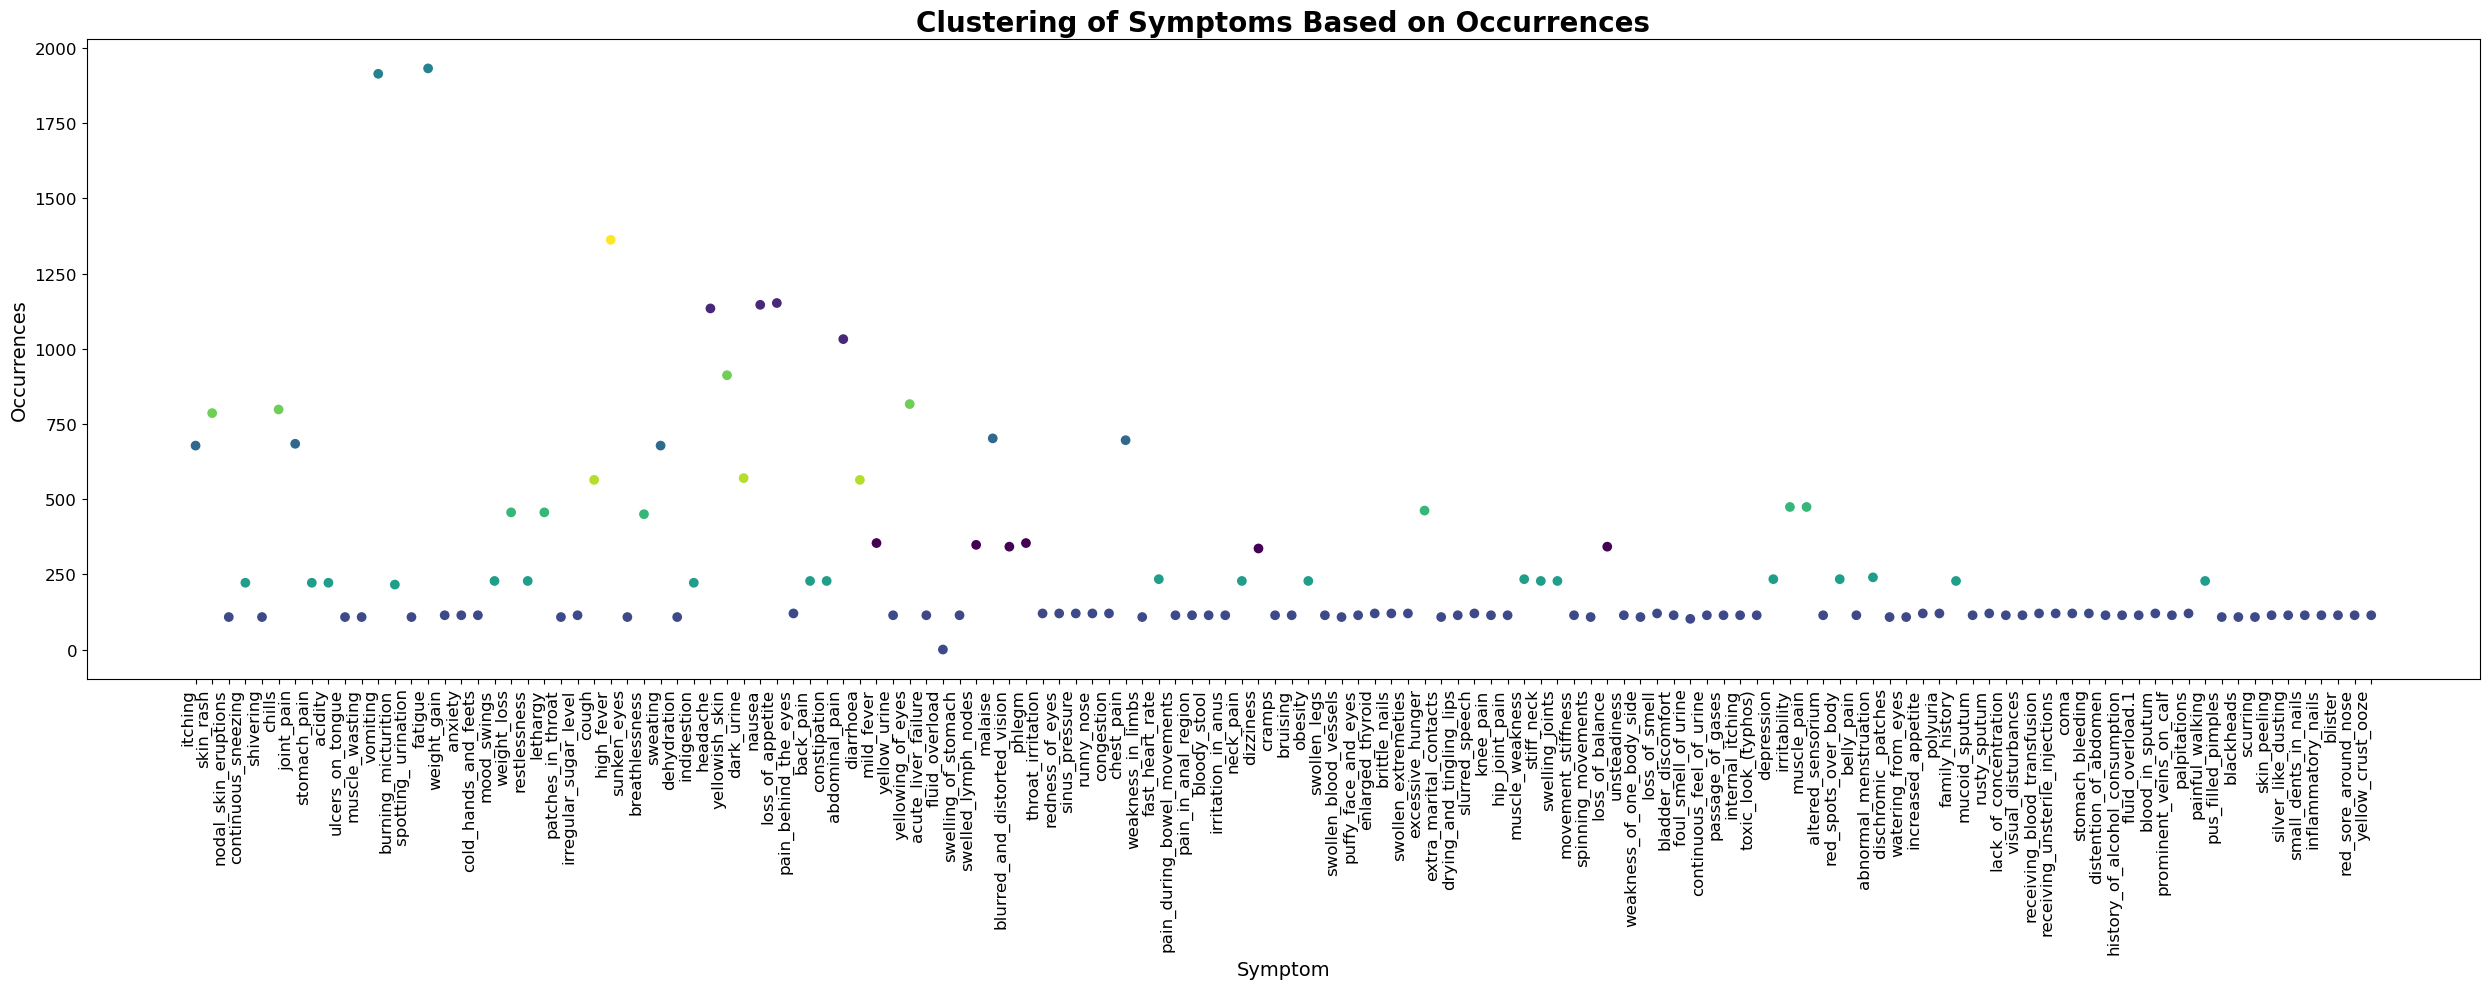

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def cluster_symptom_data(training_file, testing_file, target_column, num_kmeans):
    """
    Loads the training and testing datasets, splits them into predictors and response variables,
    calculates the sum of symptom occurrences, and applies K-means clustering.

    Parameters:
    - training_file: str - Path to the CSV file containing the training data.
    - testing_file: str - Path to the CSV file containing the testing data.
    - target_column: str - Name of the target variable column in the dataset (e.g., 'prognosis').
    - num_kmeans: int - Number of clusters for the K-means algorithm.

    Returns:
    - predictors_training_df: DataFrame - Predictors for the training set.
    - predictors_testing_df: DataFrame - Predictors for the testing set.
    - response_training_df: DataFrame - Target variable for the training set.
    - response_testing_df: DataFrame - Target variable for the testing set.
    - clustered_symptom_df: DataFrame - Symptoms with occurrence sums and their assigned cluster.
    """

    # Load the training and testing datasets
    disease_training = pd.read_csv(training_file)
    
    # Drop any unwanted columns (e.g., unnamed columns)
    if 'Unnamed: 133' in disease_training.columns:
        disease_training.drop(['Unnamed: 133'], axis=1, inplace=True)
    
    disease_testing = pd.read_csv(testing_file)

    # Split into predictors (all columns except the target) and response (target column)
    predictors_training = disease_training.drop(columns=[target_column])
    predictors_testing = disease_testing.drop(columns=[target_column])

    response_training = disease_training[target_column]
    response_testing = disease_testing[target_column]

    # Convert to pandas DataFrames
    predictors_training_df = pd.DataFrame(predictors_training)
    predictors_testing_df = pd.DataFrame(predictors_testing)
    response_training_df = pd.DataFrame(response_training)
    response_testing_df = pd.DataFrame(response_testing)

    # Sum the occurrences of each symptom across all rows in the training set
    occurrence_sums = []
    for symptom in predictors_training_df.columns:
        total_sum = predictors_training_df[symptom].sum()
        occurrence_sums.append({'symptom': symptom, 'sum': total_sum})

    # Create a DataFrame for symptom occurrence sums
    sum_symptom_df = pd.DataFrame(occurrence_sums)

    # Apply K-means clustering to the 'sum' column
    X = sum_symptom_df[['sum']]
    kmeans = KMeans(n_clusters=num_kmeans, random_state=42)
    sum_symptom_df['cluster'] = kmeans.fit_predict(X)

    # Create a DataFrame with symptoms, occurrences, and their assigned clusters
    clustered_symptom_df = sum_symptom_df[['symptom', 'sum', 'cluster']]

    # Plot the scatter plot with clustering results
    plt.figure(figsize=(25, 10))
    plt.scatter(clustered_symptom_df["symptom"], clustered_symptom_df["sum"], c=clustered_symptom_df['cluster'], cmap='viridis')

    # Add labels and title
    plt.xlabel("Symptom", fontsize=14)
    plt.ylabel("Occurrences", fontsize=14)
    plt.title("Clustering of Symptoms Based on Occurrences", fontsize=20, weight='bold')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return predictors_training_df, predictors_testing_df, response_training_df, response_testing_df, sum_symptom_df, clustered_symptom_df

# Usage
training_file = "../../../data/raw/Training.csv"
testing_file = "../../../data/raw/Testing.csv"
target_column = 'prognosis'
num_kmeans = 10

# Call the function
predictors_training_df, predictors_testing_df, response_training_df, response_testing_df, sum_symptom_df, clustered_symptom_df = cluster_symptom_data(
    training_file, testing_file, target_column, num_kmeans
)
